**Create a comprehensive visual analysis of the car sales dataset using different plotting libraries.**

You will find the dataset here

Dataset Columns:

Price: Sale price of the vehicle

Years: Vehicle registration year

Brand: Car brand

Model: Car model

Color: Vehicle color

State/City: Sale location

Mileage: Miles traveled

Vin: Vehicle identification number

Title Status: Clean title or salvage insurance

Lot: Lot number

Condition: Vehicle condition

Create a histogram showing the distribution of car prices.

Create a box plot showing price distribution by brand (top 10 brands).

Create an interactive scatter plot of Price vs. Mileage, color-coded by Condition.

Optional : create a heatmap of average prices by brand and condition.


In [21]:
# Importing required librarries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [1]:
# Uploading the Dataset
from google.colab import files
uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


In [5]:
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [7]:
if 'Unnamed: 0' in df.columns:
  df = df.drop(columns=['Unnamed: 0'])

df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


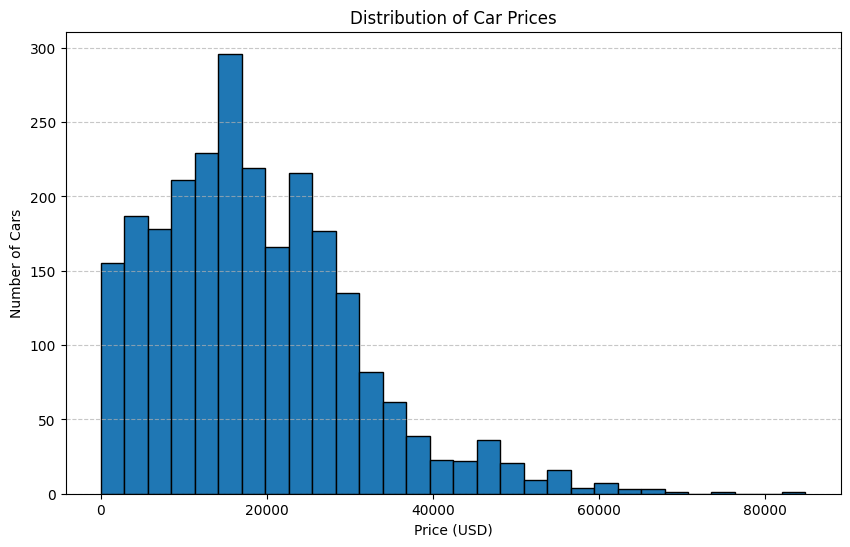

In [10]:
# Distribution of Car Prices
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins = 30, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Cars')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

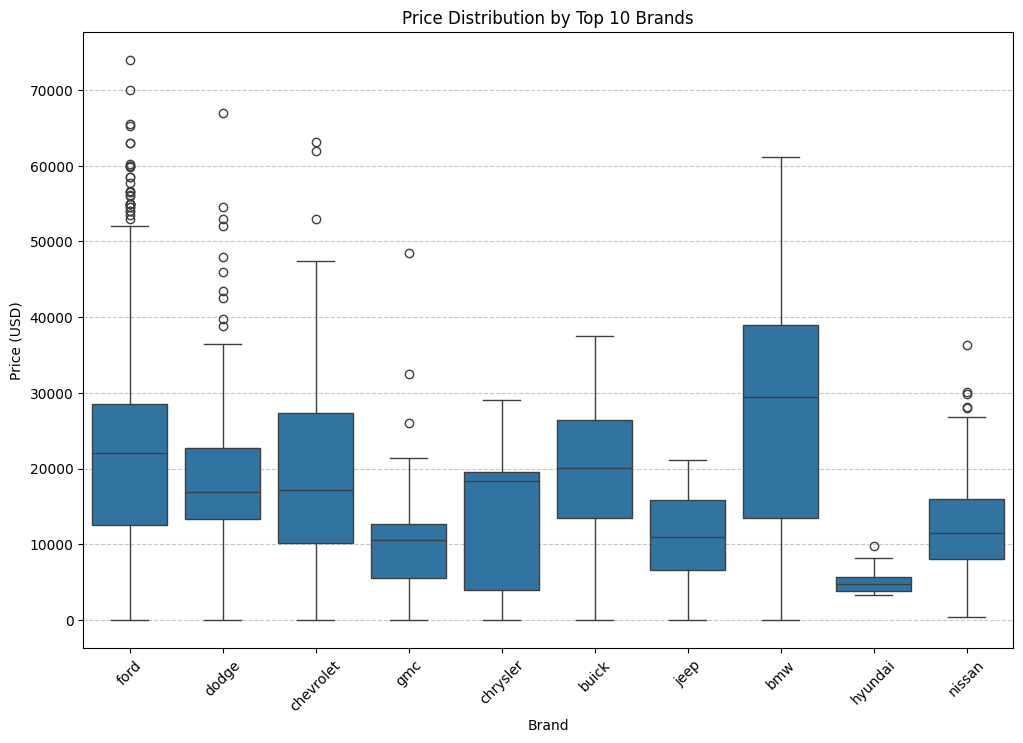

In [15]:
# BOX PLOT: Price distribution by top 10 brands

# Get top 10 brands by count
top_brands = df['brand'].value_counts().head(10).index
df_top_brands = df[df['brand'].isin(top_brands)]
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_brands, x='brand', y='price')
plt.title('Price Distribution by Top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# INTERACTIVE SCATTER PLOT: Price vs. Mileage color-coded by condition
fig = px.scatter(df, x='mileage', y='price', color='condition',
                 title='Price vs. Mileage Color-coded by Condition',
                 labels={'mileage': 'Mileage (miles)', 'price': 'Price (USD)', 'condition': 'Condition'},
                 hover_data=['brand', 'model', 'year'])
fig.show()

<ipython-input-22-e9c377cf847e>:2: FutureWarning:

The provided callable <function mean at 0x7a1fb9781da0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



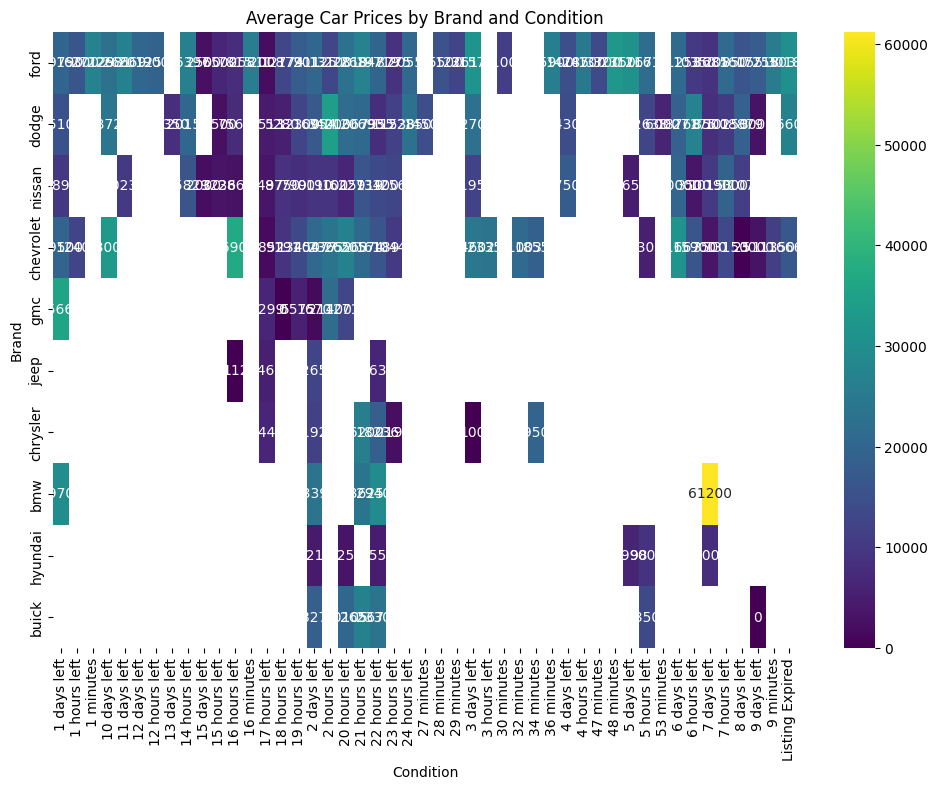

In [22]:
# HEATMAP: Average prices by brand and condition
pivot_table = df.pivot_table(values='price',
                             index='brand',
                             columns='condition',
                             aggfunc=np.mean)

# Keep only top 10 brands
pivot_table_top = pivot_table.loc[top_brands]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table_top, annot=True, fmt='.0f', cmap='viridis')
plt.title('Average Car Prices by Brand and Condition')
plt.xlabel('Condition')
plt.ylabel('Brand')
plt.show()